In [1]:
import os
import re

import gzip
import pickle
import h5py


import numpy as np
import itertools
from collections import namedtuple

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default')


import tmputil_plots as tplot

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
Results = namedtuple( "Results", 
                     ["name", "loglikes", "predictive_lls",
                      "predictive_lls2","N_used", "alphas",
                      "gammas","samples", "timestamps"])

def load_batch_results(fdir,attribute,worm_array,state_array,alpha_array,gamma_array,kappa_array):
    cresults =[]
    print(fdir)
    for worm , num_states, alpha_a_0, gamma_a_0, kappa_a_0 in\
            itertools.product(worm_array, state_array,alpha_array,
                              gamma_array,kappa_array):
        fname = "ar_scale_worm%s_states%s_alpha%s_gamma%s_kappa%s"%(worm,"%.1f" %num_states, "%.1f" %alpha_a_0, "%.1f" %gamma_a_0, "%.1f" %kappa_a_0)
        results_file = os.path.join(fdir,fname + ".pkl.gz")
        with gzip.open(results_file, "r") as f:
            results = pickle.load(f)
            out = getattr(results,attribute)
            if not (attribute =='samples'):
                cresults.append(np.asarray(out))
            else:
                cresults.append(out)
    if not (attribute =='samples'):
        cresults = np.asarray(cresults)
    return cresults

In [3]:
dir_dataraw = 'data'
dir_worm_file_list = os.path.join('results_strains', 'worm_files_lists')
dir_datastore = os.path.split(dir_worm_file_list)[0]
experiments_out = os.path.join(dir_datastore,'run010')

fname_pdata = 'pdata.npz'

In [4]:
strain_types = ['AQ2947','CB4852','CB4853','ED3017','ED3021','ED3054','N2']
strain_type = strain_types [6]

In [5]:
# Fit range of parameters for each state
state_array = [1,2,4,6,8,10,12,15] 
alpha_array = [10.0] 
gamma_array = [10.0] 
kappa_array = 10.**np.arange(2,11)[::2]

In [6]:
names_of_worms = np.load(os.path.join(dir_datastore,'joint_aus_'+strain_type+'.npz'))['worm_files']
data_sets = np.load(os.path.join(dir_datastore,'joint_aus_'+strain_type+'.npz'))['aus']
all_aus = []
for ii, data in enumerate(data_sets):
    all_aus.append(data)

In [7]:
all_x = []
all_y = []
all_angleArray=[]
all_meanAngle=[]
for myworm in names_of_worms:
    worm_file = re.sub('/','--',myworm[:-4])
    x = np.load(os.path.join(dir_datastore,worm_file,fname_pdata))['x']
    y = np.load(os.path.join(dir_datastore,worm_file,fname_pdata))['y']
    angleArray = np.load(os.path.join(dir_datastore,worm_file,fname_pdata))['angleArray']
    meanAngle = np.load(os.path.join(dir_datastore,worm_file,fname_pdata))['meanAngles']
    all_meanAngle.append(meanAngle)
    all_angleArray.append(angleArray)
    all_x.append(x)
    all_y.append(y)

In [8]:
num_pcs = 4
num_states = 6
mstate , malpha, mgamma, mkappa = num_states, 10, 10, 10**10
models = load_batch_results(experiments_out,"samples",['all'],[mstate],[malpha],[mgamma],[mkappa])
model = models[0]

results_strains/run010


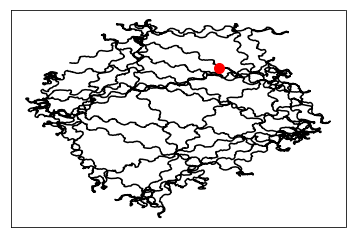

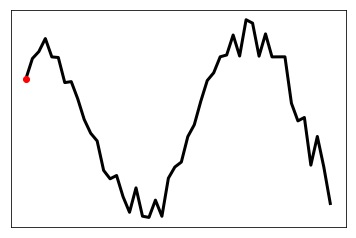

In [9]:
worm_idx = 1
tf = 4500
plt.plot(all_x[worm_idx][0,:],all_y[worm_idx][0,:],'k')
plt.plot(all_x[worm_idx][0,tf],all_y[worm_idx][0,tf],'ro',ms=10)
plt.xticks([])
plt.yticks([])
plt.show()
#plt.savefig('figures/worm_xyplot.eps', format='eps',orientation='portrait',papertype='letter')

plt.plot(all_angleArray[worm_idx][tf],'k',lw=3)#,all_angleArray[worm_idx][tf],'k')
plt.plot(all_angleArray[worm_idx][tf,0],'ro')
plt.xticks([])
plt.yticks([])
plt.show()

#plt.savefig('figures/worm_angleArray.eps', format='eps',orientation='portrait',papertype='letter')

In [10]:
from matplotlib import rc, rcParams
plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 10})

In [11]:
large_slice = np.arange(0, 3000)
plot_slice = np.arange(1200, 1800)

In [12]:
worm_idx = 2
x = all_x[worm_idx] 
y = all_y[worm_idx] 
x , y = x-x[0,0], y-y[0,0]
z, perm = tplot.relabel_model_z(model,index=worm_idx)
aus = all_aus[worm_idx][:num_pcs,:len(z)]
segment_=aus[:,plot_slice]

In [13]:
z_seg = z[plot_slice]
sub_color_array = sns.color_palette("GnBu_d",z_seg.max()+1)
color_segment = [sub_color_array[index_] for index_ in z_seg]

In [14]:
x_seg =x[:,plot_slice]
y_seg =y[:,plot_slice]
x_seg = x_seg - x_seg[0,0]
y_seg = y_seg - y_seg[0,0]

Assuming 30 Hz


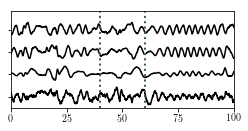

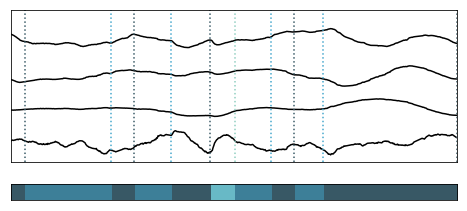

In [15]:
tplot.plot_pcs_slice(model,aus,large_slice=large_slice,plot_slice=plot_slice,num_pcs=4,
                     indiv=worm_idx,color_array=sub_color_array)#color_array)
#plt.savefig('figures/pcs_pcs_sub_states.eps')

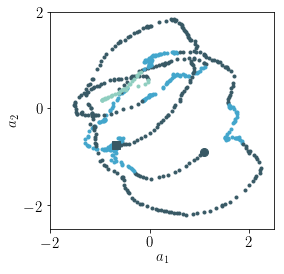

In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 15})


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

n = len(color_segment)
for ii in np.arange(n):
    c_=color_segment[ii]#next(color)
    ax.plot(segment_[0,ii],segment_[1,ii],marker='.',c=c_)
    
ax.plot(segment_[0,0],segment_[1,0],marker='o',c=color_segment[0],ms=8)
ax.plot(segment_[0,-1],segment_[1,-1],marker='s',c=color_segment[-1],ms=8)

ax.set_ylim([-2.5,2])
ax.set_xlim([-2,2.5])
ax.set_yticks(np.linspace(-2,2,3))
ax.set_xticks(np.linspace(-2,2,3))
ax.set_xlabel(r'$a_{%d}$'%1)
ax.set_ylabel(r'$a_{%d}$'%2)
#plt.savefig('figures/segments.eps')
plt.show()


# Fig2A

In [17]:
from scipy.stats import multivariate_normal
used_aus = []
num_pcs = 4
cte_train = 0.7
for ii, data in enumerate(data_sets):
    used_aus.append(data[:num_pcs,:])

origin_aus =np.vstack(used_aus)
num_aus, num_points = origin_aus.shape
num_train = int(cte_train*num_points)
num_test = num_points -num_train
test_aus = origin_aus[:,num_train:]

mus = test_aus.mean(1)
stds = np.cov(test_aus)
Y2 = multivariate_normal(mean=mus,cov=stds)
reference = Y2.logpdf(test_aus.T)
print('Num train samples {}'.format(num_points))

Num train samples 26994


In [18]:
# Given reference
start_point = 500
end_point  = 1000
num_points = end_point-start_point

# Choose specific hyperparams
malpha, mgamma, mkappa = 10.0, 10.0, kappa_array[-1]

states_plot = state_array
out_bx =[]
for ii,state in enumerate(states_plot):
    cr = load_batch_results(experiments_out,"predictive_lls",['all'],[state],[malpha],[mgamma],[mkappa])
    ll_out = cr.T[start_point:end_point] - reference.sum()
    out_bx.append(ll_out/num_test)

results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010


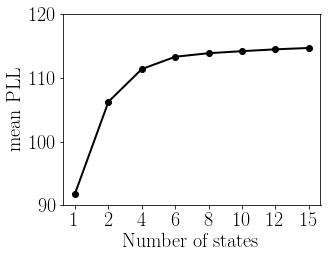

In [19]:
from matplotlib import rc, rcParams
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 20})

pll_means = list(map(np.mean,out_bx))
pll_std = list(map(np.std,out_bx))
index = np.arange(len(out_bx))

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot('111',facecolor='w')
ax.plot(index,pll_means,ls='-',lw=2,marker='o',color='k')
ax.set_xticks(index)
ax.set_xticklabels(list(map(str,state_array)))
ax.set_yticks(np.linspace(90,120,4))
ax.set_ylabel('mean PLL')
ax.set_xlabel(r'Number of states')
ax.set_ylim([90,120])
plt.tight_layout()

results_strains/run010
results_strains/run010
[13  2  0  4  1  5  8  3  6 10 12  7  9 11 14]
[ 2  0  4  1  5  8  3  6 10 12  7  9 11 14 13]
14.0
14.0


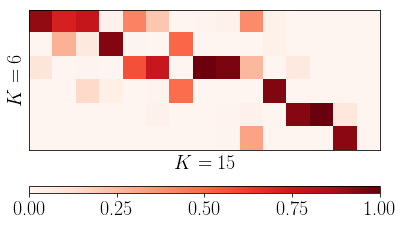

In [20]:
plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 20})

worm_idx = 2
malpha, mgamma, mkappa = 10.0, 10.0, 10**10.0 #max_ll

dim1 , dim2 = 6,15
model1 = load_batch_results(experiments_out,"samples",['all'],[dim1],[malpha],[mgamma],[mkappa])[0]
model2 = load_batch_results(experiments_out,"samples",['all'],[dim2],[malpha],[mgamma],[mkappa])[0]
z1, perm1 = tplot.relabel_model_z(model1,index=worm_idx,plot_en=False)
z2, perm2 = tplot.relabel_model_z(model2,index=worm_idx,plot_en=False)
tplot.state_correlation(z1,z2)
#plt.savefig('figures/states_labeled_6_vs_15_kappa10_10.svg')

In [21]:
# given reference
start_point =500
end_point  = 1000
num_points = end_point-start_point

# Choose specific hyper
malpha, mgamma, mkappa = 10.0, 10.0, 100.0 #max_l

kappa_plot = kappa_array
out_bx =[]
for ii, mkappa in enumerate(kappa_plot):
    cr = load_batch_results(experiments_out,"predictive_lls",['all'],[6],[malpha],[mgamma],[mkappa])
    ll_out = cr.T[start_point:end_point] - reference.sum()
    out_bx.append(ll_out/num_test)

results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010


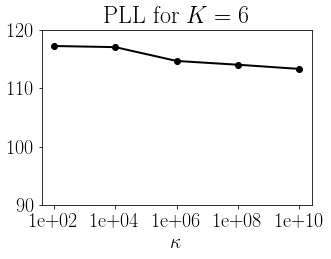

In [22]:
float_formatter = lambda x: "%.e" % x

pll_means = list(map(np.mean,out_bx))
pll_std = list(map(np.std,out_bx))
index = np.arange(len(out_bx))

plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot('111',facecolor='w')
ax.semilogx(kappa_array,pll_means,ls='-',lw=2,marker='o',color='k')

ax.set_xticks(kappa_array)
ax.set_xticklabels(list(map(float_formatter,kappa_array)))
ax.set_xlabel(r'$\kappa$')
ax.set_title(r'PLL for $K=%d$'%6)
ax.set_yticks(np.linspace(90,120,4))
ax.set_ylim((90,120))
plt.tight_layout()
#plt.savefig('figures/mpll_K6_vs_kappa.svg')

In [23]:
bins = np.linspace(0, 200, 40)
worm_idx = 2
dr_all = []
from pyhsmm.util.general import rle
malpha, mgamma, mkappa = 10.0, 10.0, 100.0 #max_ll
for mkappa in kappa_array:
    model1 = load_batch_results(experiments_out,"samples",['all'],[6],[malpha],[mgamma],[mkappa])[0]
    z1, perm1 = tplot.relabel_model_z(model1,index=worm_idx,plot_en=False)
    state_seq, durations = rle(z1)
    dr_ = durations[state_seq==4]
    dr_all.append(dr_)


results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010
results_strains/run010


In [24]:
## apend Yemini
worm_file_path = names_of_worms[worm_idx]
data_dir_orig = os.path.join(dir_dataraw,worm_file_path)

f = h5py.File(data_dir_orig,'r')
worm_modes= f['worm']['locomotion']['motion']['mode'][()]
worm_modes_new = worm_modes.copy().flatten()
fps = f['info']['video']['resolution']['fps'][0][0]

OSError: Unable to open file (Unable to open file: name = 'data/n2/on_food/xx/30m_wait/r/tracker_2/2011-04-13___11_19_12/n2 on food l_2011_04_13__11_19_12___2___3_features.mat', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
dr_all.append(durations[state_seq==0])

In [ ]:
frames_len = dr_all[-1]/fps

/Users/scott/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/scott/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


NameError: name 'frames_len' is not defined

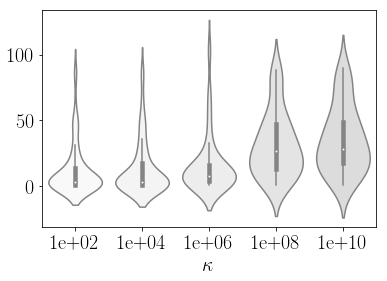

In [25]:
plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 20})

float_formatter = lambda x: "%.e" %x
fig = plt.figure(figsize=(6,4))
current_palette = sns.color_palette('Greys',20)
sns.set_palette(current_palette)
ax = sns.violinplot(data=dr_all, pallete=None, split=True,scale='width',
                    orient='v',scale_hue=False)

x_labels=list(map(float_formatter,kappa_array))
x_labels.append(r'Labeled'+'\n'+'data')
ax.set_xticklabels(x_labels)
ax.set_xlabel(r'$\kappa$')

ylabels= np.linspace(0,frames_len.max(),3,dtype=int)
ax.set_yticks(ylabels*fps)
ax.set_yticklabels(list(map(str,ylabels)))

[t.set_color(i) for (i,t) in
 zip(['k']*(len(kappa_array))+['r'],ax.xaxis.get_ticklabels())]

plt.tight_layout()
#plt.savefig('figures/pd_rest_state_duration_vs_kappa_violin.svg')

In [26]:
def make_fig3(worm_modes_new,model, xt, index=0, num_pcs=4, num_states=4,color_array=None,vel=False):
    """
    """
    import math
    
    from matplotlib import rc, rcParams
    import matplotlib
    plt.rc('text', usetex=True)
    plt.rc('font', family='times')
    rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
    matplotlib.rcParams.update({'font.size': 20})
    
    z, perm = tplot.relabel_model_z(model,index=index)
    usages_perm = model.state_usages[perm]
    dynamics_distns = [model.obs_distns[p] for p in perm]
    ###################
    # manually swapping states so that forward, bwk and rest states are together
    ###################
    num_comb_pcs =  int(math.factorial(num_pcs)/(math.factorial(2)*math.factorial(num_pcs-2)))
    fig, ax = plt.subplots(2,num_states-1,figsize=((num_states-1)*2,4));

    dsample = 50
    if color_array is None:
        color_array = model._get_colors()

    state_names = ['Fwd 1','Fwd 2','Fwd 3','Rest','Rev']
    for ii, state in enumerate([3,1,0,2,4]):#[3,1,0,5,2,4]):
        D_latent = dynamics_distns[state].D_out
        Ak = dynamics_distns[state].A[:,:D_latent]
        bk = dynamics_distns[state].A[:,D_latent:]
        x_t = xt[:,np.where(z==state)[0]]
        mu_tp1 = Ak.T.dot(x_t) + bk - x_t

        if vel:
            color_vel = color_array[np.where(z==state)[0]]
       # downsample
        if (x_t.shape[1]>dsample):
            dwr = int(x_t.shape[1] / dsample)
            print ('state {}: downsample by {} from {} steps'.format(state,dwr,x_t.shape[1] ))
            x_t = x_t[:,::dwr]
            mu_tp1 = mu_tp1[:,::dwr]
            print('state {} : {} steps'.format(state,x_t.shape[1]))
            if vel:
                color_vel = color_vel[::dwr]
            
            if x_t.shape[1] > dsample:
                x_t = x_t[:,:dsample]
                mu_tp1 = mu_tp1[:,:dsample]
                print('state {} : Selecting {} steps'.format(state,x_t.shape[1]))
                if vel:
                    color_vel = color_vel[:dsample]               
        else:
            print('state {} : {} steps'.format(state,x_t.shape[1]))
        
        for cpair , pair in enumerate([(0,1)]):
            i, j = pair 
            x_t_i,x_t_j =x_t[i,:],x_t[j,:]
            mu_tp1_i, mu_tp1_j=mu_tp1[i,:], mu_tp1[j,:]
            if vel :
                print('see original code')
            else:
                ax[cpair,ii].quiver(x_t_i,x_t_j,mu_tp1_i,mu_tp1_j,alpha=0.5, \
                        headwidth=4., headlength=5., headaxislength=3.5, scale=1.5, \
                                   color=color_array[state],lw=10.0,\
                                  width = 0.015)

            if cpair ==0:
                ax[cpair,ii].set_title('%s'%(state_names[ii]))
            
            x_y_lim = np.linspace(-2,2,3)
            ax[cpair,ii].set_ylim((-2.5,2.5))
            ax[cpair,ii].set_xlim((-2.5,2.5))
            ax[cpair,ii].set_xticks(x_y_lim)
            ax[cpair,ii].set_yticks(x_y_lim)
        # Reference
        c_state_pos = np.argwhere(z==state)
        worms_pos = worm_modes_new[c_state_pos]
        ax[1,ii].hist(worms_pos[~np.isnan(worms_pos)],bins=[-1,0,1,2],align='left',
                       normed=True,facecolor='gray', edgecolor='k',rwidth=0.8)
        ax[1,ii].set_xticks([-1,0,1])
        ax[1,ii].set_xticklabels(['rev','rest','fwd'])
        ax[1,ii].set_ylim(0,1)
        
        if ii > 0:
            for arx in np.arange(2):
                ax[arx,ii].set_yticklabels([])
                
        iii = i+1
        jjj = j+1
        sss = state+1
        plt.subplots_adjust(hspace=0.3)
        plt.tight_layout()
    return

In [27]:
# Make State dynamics plot
import matplotlib._color_data as mcd
color_grays = ['k']*6
make_fig3(worm_modes_new,model, aus, index=worm_idx, num_pcs=4, num_states=6,color_array=color_grays,vel=False)

NameError: name 'worm_modes_new' is not defined

In [30]:
C_plot = model.trans_distn.trans_matrix.copy()
C_plot2 = C_plot/C_plot.sum(1,keepdims=True)

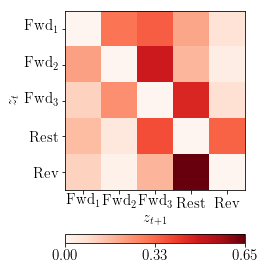

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('text', usetex=True)
plt.rc('font', family='times')
rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = fig.add_subplot('111')
state_names = ['Fwd$_{1}$','Fwd$_{2}$','Fwd$_{3}$','Rest$_{\,}$','Rev$_ $']

# State transitions
C_plot = model.trans_distn.trans_matrix.copy()
np.fill_diagonal(C_plot,0)
vals_=perm[[[3,1,0,2,4]]] #[3,1,0,5,2,4]]]
C_plot = C_plot / C_plot.sum(1,keepdims=True)
im = ax.imshow(C_plot[np.ix_(vals_,vals_)],
               cmap='Reds',vmin=0,vmax=C_plot.max())
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))

ax.set_xticklabels(state_names,va='top')
ax.set_yticklabels(state_names,ha='right')

ax.set_ylabel(r'$z_{t}$')
ax.set_xlabel(r'$z_{t+1}$')
divider = make_axes_locatable(ax)

cax = divider.append_axes('bottom',size='5%',pad=0.6)
cbar = plt.colorbar(im,cax=cax,orientation='horizontal',format='%.2f',\
                   ticks=np.linspace(0,C_plot.max(),3))
cbar.ax.set_yticklabels(np.linspace(0,C_plot.max(),3))
plt.tight_layout()
#plt.savefig('figures/transition_matrix.svg')